# Chapter 4 | Training Models

## Linear Regression

a simple regression model of life satisfaction :  
$\text{life_satisfaction} = \theta_0 + \theta_1 \times \text{GPD}\_per\_capita $

### The Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x_0 + noise

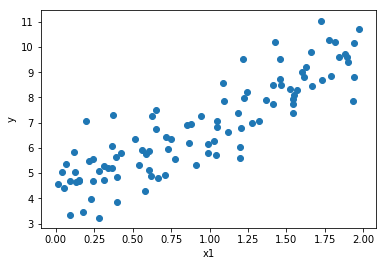

In [2]:
%matplotlib inline

plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
print(f"Original function : y = 4 + 3x_0 + noise")
print(f"Theat best function : y = {theta_best[0][0]:.2f} + {theta_best[1][0]:.2f}x_0")

Original function : y = 4 + 3x_0 + noise
Theat best function : y = 4.22 + 2.77x_0


Now we can make predictions

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

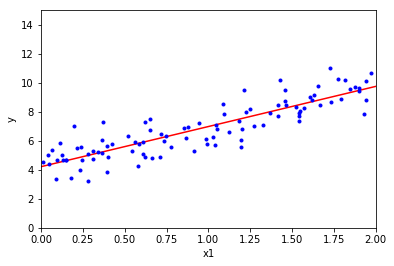

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

Equivalent in Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(f"Prediction : {lin_reg.predict(X_new)}")

[4.21509616] [[2.77011339]]
Prediction : [[4.21509616]
 [9.75532293]]


## Gradient Descent

In [8]:
# Gradient Descent alogrithm implementation

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.18475289],
       [2.73036719]])

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\tools\Anaconda3\envs\mlbook\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.2287996]), array([2.79011436]))

### Mini-batch Gradient Descent

instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

![Figure 4-11. Gradient Descent paths in parameter space](./images/chap4/figure4.11.png "Logo Title Text 1")

## Polynomial Regression

What if your data is actually more complex than a simple straight line?

In [12]:
m = 100
X = np.array(6 * np.random.rand(m, 1) - 3)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

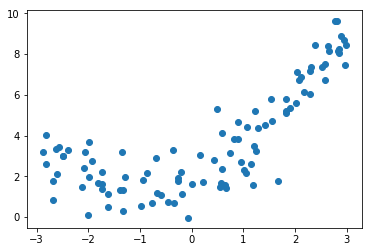

In [13]:
plt.scatter(X, y)
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"X[0] : {X[0]}")
print(f"X_poly[0] : {X_poly[0]}")

X[0] : [2.94407494]
X_poly[0] : [2.94407494 8.66757727]


In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

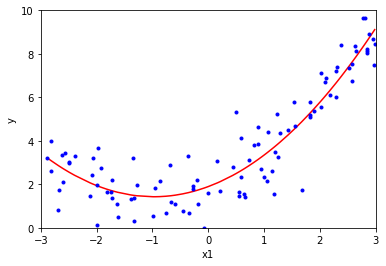

In [17]:
y_predict = (X**2).dot(lin_reg.coef_[0, 1]) + X.dot(lin_reg.coef_[0, 0]) + lin_reg.intercept_

lists = sorted(zip(*[X, y_predict]))
new_x, new_y = list(zip(*lists))

plt.plot(new_x, new_y, "r")
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

In [ ]:
# p.123 | Learning Curves